## Zillow Analytics
### Zillow provides the largest online real estate database in the U.S.
### It becomes one of the most important marketing tools to advertise all kinds of property (land, house, commericals, etc.) and become a trusted website to find information for most of property in the U.S. 
### One of the unique features is Zestimate. Zestimate is an estimate valuation of each property based on public data in which all the guest can access. Moreover, it also shows almost up-to-date information for each property, such as square footage, the houses feature (number of bedrooms, bath, etc.) and some neighborhood information.
### Zillow also provides Application Programming Interface (API) which allows everyone who sign up to collect certain number of their data easily. Moreover, other ways of data collection without this API will be consider as a violation of Zillow terms of use. 
### There are 3 categories of Zillow API that can be use for free, which are: Home Valuation, Property Details and Neighborhood Data, with Limit queries to 1,000 per day, per API (https://www.zillow.com/howto/api/APITerms.htm)
### Therefore, if you are interested to collect Zillow data, it is important to know how to use Zillow API, especially the free ones, in which you can find in this tutorial.

## This tutorial will cover these following:

![](summary.gif?raw=true)

# Chapter 1 : Zillow API

## 1. Sign up: https://www.zillow.com/

![](Zillowsign.gif?raw=true)

## 2. Get Zillow Web Service ID (ZWSID) : https://www.zillow.com/howto/api/APIOverview.htm

<img src = "zillowapi.gif">

## 3.	Choose one of the API : https://www.zillow.com/howto/api/GetZestimate.htm

<img src = "zillowchoose.gif">
<img src = "zillowchoose2.gif">

## 4. Test Zestimate API with ZPID : http://www.zillow.com/webservice/GetZestimate.htm?zws-id=YourZWSID&zpid=48749425

<img src = "zillowcheck.gif">

## 5. Test Zestimate API with QUERY : http://www.zillow.com/webservice/GetSearchResults.htm?zws-id= YourZWSID &address=1617-Leavenworth-Street&citystatezip=66502
#### Note : For query address, remember to replace space with –

<img src = "zillowcheck2.gif">

## 6. Zillow API only return in XML format (not JSON) : https://www.zillow.com/advice-thread/Is-there-a-way-to-get-API-data-in-JSON-format-If-not-is-there-any-plan-to-add-JSON-as-an-option/494343/



# Chapter 2 : Python Zillow API (Valuation API)

## 1. Setup : 
### https://github.com/seme0021/python-zillow

### Open command prompt windows:
#### Pip install python-zillow

## 2.  Requirement module : 
### https://github.com/seme0021/python-zillow/blob/master/requirements.txt

### Open command prompt windows:
#### Pip install requests
#### Pip install xmltodict
#### Pip install nose
#### Pip install coverage
#### Note: make sure pip is registered in windows global path

## 3. Configure ZWSID : zillow_key.conf

<img src = "zillowconfig.gif">



## 4. Example : to get estimated house value by an address

In [1]:
import zillow
import json

### Open your ZWSID
with open("zillow_key.conf", 'r') as f:
    key = f.readline().replace("\n", "")
    
api = zillow.ValuationApi()

# Find a place given an address
address = "2520 Heartland DR Manhattan, KS"
postal_code = "66503"

# Dictionary of address result
data = api.GetSearchResults(key, address, postal_code)

# JSON of address result
Result = json.loads(json.dumps(data.get_dict()))

print "Result"
print "Address : " + Result["full_address"]["street"] + ", " + Result["full_address"]["city"] + ", " + Result["full_address"]["zipcode"]
print "Last Updated : " + Result["zestimate"]["amount_last_updated"]
print "Estimated Value : " + Result["zestimate"]["amount_currency"]+ " " + str(Result["zestimate"]["amount"])
print "Value Range High :" + Result["zestimate"]["amount_currency"]+ " " + str(Result["zestimate"]["valuation_range_high"])
print "Value Range Low : " + Result["zestimate"]["amount_currency"]+ " " + str(Result["zestimate"]["valuation_range_low"])

Result
Address : 2520 Heartland Dr, Manhattan, 66503
Last Updated : 11/10/2017
Estimated Value : USD 555216
Value Range High :USD 582977
Value Range Low : USD 516351


# Chapter 3 : PyZillow API (Property API)

## 1. Setup : 
### http://pyzillow.readthedocs.io/en/latest/
### https://pypi.python.org/pypi/pyzillow/0.5.5

<img src = "pyzillow1.gif">

## 2. Requirement module : https://github.com/hanneshapke/pyzillow/blob/master/requirements/test_requirements.txt


<img src = "pyzillow2.gif">

### Open command prompt windows:
#### Pip install requests
#### Pip install xmltodict
#### Pip install nose
#### Pip install coverage
##### Note: make sure pip is registered in windows global path





## 3. Example : get house data by an address

In [2]:
from pyzillow.pyzillow import ZillowWrapper, GetDeepSearchResults
from pyzillow.pyzillow import ZillowWrapper, GetUpdatedPropertyDetails

### Open your ZWSID
with open("zillow_key.conf", 'r') as f:
    key = f.readline().replace("\n", "")

zillow_data = ZillowWrapper(key)

# Find a place given an address
address = "2520 Heartland DR Manhattan, KS"
postal_code = "66503"

# Address data result
deep_search_response = zillow_data.get_deep_search_results(address, postal_code)
result = GetDeepSearchResults(deep_search_response)

print "" + result.zillow_id
print "" + result.home_type
print "" + result.home_detail_link
print "" + str(result.graph_data_link)
print "" + result.map_this_home_link
print "" + result.latitude
print "" + result.latitude
print "" + str(result.tax_year)
print "" + str(result.tax_value)
print "" + result.year_built
print "" + result.property_size
print "" + result.home_size
print "" + result.bathrooms
print "" + result.bedrooms
print "" + str(result.last_sold_date)
print "" + result.zestimate_amount
print "" + result.zestimate_last_updated
print "" + result.zestimate_valuation_range_high
print "" + result.zestimate_valuationRange_low
print "" + result.zestimate_percentile


91213690
SingleFamily
http://www.zillow.com/homedetails/2520-Heartland-Dr-Manhattan-KS-66503/91213690_zpid/
http://www.zillow.com/homedetails/2520-Heartland-Dr-Manhattan-KS-66503/91213690_zpid/#charts-and-data
http://www.zillow.com/homes/91213690_zpid/
39.206639
39.206639
2017
687690.0
2008
19166
3008
4.5
5
None
555216
11/10/2017
582977
516351
0


# Chapter 4 : Python (Valuation API)

## 1. Example : Valuation API with plain python

In [3]:
import requests
import xmltodict
import urllib2
from PIL import Image
import cStringIO

# Get our unique ZWSID from text file
# Make sure zillow_key.conf exist within our ipynb folder
with open("zillow_key.conf", 'r') as f:
    key = f.readline().replace("\n", "")

##########################
# 1. GetSearchResult API #
##########################

# Set our ZWSID and address that we'd like to search
data = {'zws-id' : key, 'address' : '2732 Tobacco Rd', 'citystatezip': 'Manhattan, KS'}

# Making request to zillow API
# Note:
# The request will be formatted like following :
# https://www.zillow.com/webservice/GetSearchResults.htm?zws-id=xxx_3bebs&address=2732 Tobacco Rd&citystatezip=Manhattan, KS
# We also can paste and test it on web browser address bar
response = requests.get("https://www.zillow.com/webservice/GetSearchResults.htm", params = data)

# If our request successfully processed, the response status code will be 200
if response.status_code == 200:
    # the response will be in XML document format
    responseResultXML = response.text
else:
    print "Ooopss... something went wrong : " + response.status_code

# Let's try to view the response in XML document format
print responseResultXML

# To make it easier for us to access the response
# We can convert the XML document format into Python dictionary
responseResultDict = xmltodict.parse(responseResultXML)

# now we can try to view the response in Python dictionary format
print responseResultDict


<?xml version="1.0" encoding="utf-8"?><SearchResults:searchresults xsi:schemaLocation="http://www.zillow.com/static/xsd/SearchResults.xsd https://www.zillowstatic.com/vstatic/64dd1c9/static/xsd/SearchResults.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:SearchResults="http://www.zillow.com/static/xsd/SearchResults.xsd"><request><address>2732 Tobacco Rd</address><citystatezip>Manhattan, KS</citystatezip></request><message><text>Request successfully processed</text><code>0</code></message><response><results><result><zpid>2105558144</zpid><links><homedetails>https://www.zillow.com/homedetails/2732-Tobacco-Rd-Manhattan-KS-66503/2105558144_zpid/</homedetails><mapthishome>http://www.zillow.com/homes/2105558144_zpid/</mapthishome><comparables>http://www.zillow.com/homes/comps/2105558144_zpid/</comparables></links><address><street>2732 Tobacco Rd</street><zipcode>66503</zipcode><city>Manhattan</city><state>KS</state><latitude>39.1944</latitude><longitude>-96.6453</longitude>

<img src = "Chap4.gif">

In [4]:
# Let's see the ROOT (see from the above picture)
print responseResultDict.get('SearchResults:searchresults')

OrderedDict([(u'@xsi:schemaLocation', u'http://www.zillow.com/static/xsd/SearchResults.xsd https://www.zillowstatic.com/vstatic/64dd1c9/static/xsd/SearchResults.xsd'), (u'@xmlns:xsi', u'http://www.w3.org/2001/XMLSchema-instance'), (u'@xmlns:SearchResults', u'http://www.zillow.com/static/xsd/SearchResults.xsd'), (u'request', OrderedDict([(u'address', u'2732 Tobacco Rd'), (u'citystatezip', u'Manhattan, KS')])), (u'message', OrderedDict([(u'text', u'Request successfully processed'), (u'code', u'0')])), (u'response', OrderedDict([(u'results', OrderedDict([(u'result', OrderedDict([(u'zpid', u'2105558144'), (u'links', OrderedDict([(u'homedetails', u'https://www.zillow.com/homedetails/2732-Tobacco-Rd-Manhattan-KS-66503/2105558144_zpid/'), (u'mapthishome', u'http://www.zillow.com/homes/2105558144_zpid/'), (u'comparables', u'http://www.zillow.com/homes/comps/2105558144_zpid/')])), (u'address', OrderedDict([(u'street', u'2732 Tobacco Rd'), (u'zipcode', u'66503'), (u'city', u'Manhattan'), (u'stat

<img src = "Chap4b.gif">

In [5]:
# There are 3 elements inside the ROOT (see from the above picture)
# 1 request : this is our request
print responseResultDict.get('SearchResults:searchresults')['request']

# 2 message : this is message whether our request is successfull or others
print responseResultDict.get('SearchResults:searchresults')['message']

# 3 response : this is the actual response of our request
# Note : we need to drill-down to results and result to get the actual data
print responseResultDict.get('SearchResults:searchresults')['response']['results']['result']


OrderedDict([(u'address', u'2732 Tobacco Rd'), (u'citystatezip', u'Manhattan, KS')])
OrderedDict([(u'text', u'Request successfully processed'), (u'code', u'0')])
OrderedDict([(u'zpid', u'2105558144'), (u'links', OrderedDict([(u'homedetails', u'https://www.zillow.com/homedetails/2732-Tobacco-Rd-Manhattan-KS-66503/2105558144_zpid/'), (u'mapthishome', u'http://www.zillow.com/homes/2105558144_zpid/'), (u'comparables', u'http://www.zillow.com/homes/comps/2105558144_zpid/')])), (u'address', OrderedDict([(u'street', u'2732 Tobacco Rd'), (u'zipcode', u'66503'), (u'city', u'Manhattan'), (u'state', u'KS'), (u'latitude', u'39.1944'), (u'longitude', u'-96.6453')])), (u'zestimate', OrderedDict([(u'amount', OrderedDict([(u'@currency', u'USD'), ('#text', u'262045')])), (u'last-updated', u'11/10/2017'), (u'oneWeekChange', OrderedDict([(u'@deprecated', u'true')])), (u'valueChange', OrderedDict([(u'@duration', u'30'), (u'@currency', u'USD'), ('#text', u'4470')])), (u'valuationRange', OrderedDict([(u'low

<img src = "Chap4c.gif">

In [6]:
# Example (see from the above picture)
myCurrency = responseResultDict.get('SearchResults:searchresults')['response']['results']['result']['zestimate']['amount']['@currency']
myEstimate = responseResultDict.get('SearchResults:searchresults')['response']['results']['result']['zestimate']['amount']['#text']
print myCurrency + " " + myEstimate

USD 262045


In [7]:
#######################
# 2. GetZestimate API #
#######################

# Set our ZWSID and zpid that we'd like to search
data = {'zws-id' : key, 'zpid' : '2100641621'}

# Making request to zillow API
# Note:
# The request will be formatted like following :
# https://www.zillow.com/webservice/GetZestimate.htm?zws-id=xxx_3bebs&zpid=2100641621
# We also can paste and test it on web browser address bar
response = requests.get("https://www.zillow.com/webservice/GetZestimate.htm", params = data)

# If our request successfully processed, the response status code will be 200
if response.status_code == 200:
    # the response will be in XML document format
    responseResultXML = response.text
else:
    print "Ooopss... something went wrong : " + response.status_code

# Let's try to view the response in XML document format
print responseResultXML

# To make it easier for us to access the response
# We can convert the XML document format into Python dictionary
responseResultDict = xmltodict.parse(responseResultXML)

# now we can try to view the response in Python dictionary format
print responseResultDict


<?xml version="1.0" encoding="utf-8"?><Zestimate:zestimate xsi:schemaLocation="http://www.zillow.com/static/xsd/Zestimate.xsd https://www.zillowstatic.com/vstatic/64dd1c9/static/xsd/Zestimate.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:Zestimate="http://www.zillow.com/static/xsd/Zestimate.xsd"><request><zpid>2100641621</zpid></request><message><text>Request successfully processed</text><code>0</code></message><response><zpid>2100641621</zpid><links><homedetails>https://www.zillow.com/homedetails/3400-Pacific-Ave-APT-201-Marina-Del-Rey-CA-90292/2100641621_zpid/</homedetails><mapthishome>http://www.zillow.com/homes/2100641621_zpid/</mapthishome><comparables>http://www.zillow.com/homes/comps/2100641621_zpid/</comparables></links><address><street>3400 Pacific Ave APT 201</street><zipcode>90292</zipcode><city>Marina Del Rey</city><state>CA</state><latitude>33.9781</latitude><longitude>-118.4643</longitude></address><zestimate><amount currency="USD">2530369</amount><last

<img src = "Chap4d.gif">

In [8]:
# Let's see the ROOT (see from the above picture)
responseResultDict.get('Zestimate:zestimate')

OrderedDict([(u'@xsi:schemaLocation',
              u'http://www.zillow.com/static/xsd/Zestimate.xsd https://www.zillowstatic.com/vstatic/64dd1c9/static/xsd/Zestimate.xsd'),
             (u'@xmlns:xsi', u'http://www.w3.org/2001/XMLSchema-instance'),
             (u'@xmlns:Zestimate',
              u'http://www.zillow.com/static/xsd/Zestimate.xsd'),
             (u'request', OrderedDict([(u'zpid', u'2100641621')])),
             (u'message',
              OrderedDict([(u'text', u'Request successfully processed'),
                           (u'code', u'0')])),
             (u'response',
              OrderedDict([(u'zpid', u'2100641621'),
                           (u'links',
                            OrderedDict([(u'homedetails',
                                          u'https://www.zillow.com/homedetails/3400-Pacific-Ave-APT-201-Marina-Del-Rey-CA-90292/2100641621_zpid/'),
                                         (u'mapthishome',
                                          u'http://ww

<img src = "Chap4e.gif">

In [9]:
# There are 3 elements inside the ROOT (see from the above picture)
# 1 request : this is our request
responseResultDict.get('Zestimate:zestimate')['request']

# 2 message : this is message whether our request is successfull or others
responseResultDict.get('Zestimate:zestimate')['message']

# 3 response : this is the actual response of our request
# Note : we need to drill-down to results and result to get the actual data
responseResultDict.get('Zestimate:zestimate')['response']


OrderedDict([(u'zpid', u'2100641621'),
             (u'links',
              OrderedDict([(u'homedetails',
                            u'https://www.zillow.com/homedetails/3400-Pacific-Ave-APT-201-Marina-Del-Rey-CA-90292/2100641621_zpid/'),
                           (u'mapthishome',
                            u'http://www.zillow.com/homes/2100641621_zpid/'),
                           (u'comparables',
                            u'http://www.zillow.com/homes/comps/2100641621_zpid/')])),
             (u'address',
              OrderedDict([(u'street', u'3400 Pacific Ave APT 201'),
                           (u'zipcode', u'90292'),
                           (u'city', u'Marina Del Rey'),
                           (u'state', u'CA'),
                           (u'latitude', u'33.9781'),
                           (u'longitude', u'-118.4643')])),
             (u'zestimate',
              OrderedDict([(u'amount',
                            OrderedDict([(u'@currency', u'USD'),
           

<img src = "Chap4f.gif">

In [10]:
# Example (see from the above picture)
myCurrency = responseResultDict.get('Zestimate:zestimate')['response']['zestimate']['amount']['@currency']
myEstimate = responseResultDict.get('Zestimate:zestimate')['response']['zestimate']['amount']['#text']
print myCurrency + " " + myEstimate

USD 2530369


In [11]:
###################
# 3. GetChart API #
###################

# Set our ZWSID and zpid that we'd like to search
data = {'zws-id' : key,
        'zpid' : '2105558144',
        'unit-type' : 'dollar',
        'width' : 600,
        'height' : 300,
        'chartDuration' : '10years'}

# Making request to zillow API
# Note:
# The request will be formatted like following :
# https://www.zillow.com/webservice/GetChart.htm?zws-id=xxx_3bebs&zpid=2105558144&unit-type=dollar&width=600&height=300&chartDuration=10years
# We also can paste and test it on web browser address bar
response = requests.get("https://www.zillow.com/webservice/GetChart.htm", params = data)

# If our request successfully processed, the response status code will be 200
if response.status_code == 200:
    # the response will be in XML document format
    responseResultXML = response.text
else:
    print "Ooopss... something went wrong : " + response.status_code

# Let's try to view the response in XML document format
print responseResultXML

# To make it easier for us to access the response
# We can convert the XML document format into Python dictionary
responseResultDict = xmltodict.parse(responseResultXML)

# now we can try to view the response in Python dictionary format
print responseResultDict


<?xml version="1.0" encoding="utf-8"?><Chart:chart xsi:schemaLocation="http://www.zillow.com/static/xsd/Chart.xsd https://www.zillowstatic.com/vstatic/64dd1c9/static/xsd/Chart.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:Chart="http://www.zillow.com/static/xsd/Chart.xsd"><request><zpid>2105558144</zpid><unit-type>dollar</unit-type><width>600</width><height>300</height></request><message><text>Request successfully processed</text><code>0</code></message><response><url>https://www.zillow.com:443/app?chartDuration=10years&amp;chartType=partner&amp;height=300&amp;page=webservice%2FGetChart&amp;service=chart&amp;width=600&amp;zpid=2105558144</url></response></Chart:chart><!-- H:010  T:79ms  S:202  R:Mon Nov 13 14:17:05 PST 2017  B:5.0.49536.3-hotfix_2017-11-06.b48c77d~hotfix-platform-for-2017-11-06.a932834 -->
OrderedDict([(u'Chart:chart', OrderedDict([(u'@xsi:schemaLocation', u'http://www.zillow.com/static/xsd/Chart.xsd https://www.zillowstatic.com/vstatic/64dd1c9/stati

<img src = "Chap4g.gif">

In [12]:
# Let's see the ROOT (see from the above picture)
responseResultDict.get('Chart:chart')

OrderedDict([(u'@xsi:schemaLocation',
              u'http://www.zillow.com/static/xsd/Chart.xsd https://www.zillowstatic.com/vstatic/64dd1c9/static/xsd/Chart.xsd'),
             (u'@xmlns:xsi', u'http://www.w3.org/2001/XMLSchema-instance'),
             (u'@xmlns:Chart', u'http://www.zillow.com/static/xsd/Chart.xsd'),
             (u'request',
              OrderedDict([(u'zpid', u'2105558144'),
                           (u'unit-type', u'dollar'),
                           (u'width', u'600'),
                           (u'height', u'300')])),
             (u'message',
              OrderedDict([(u'text', u'Request successfully processed'),
                           (u'code', u'0')])),
             (u'response',
              OrderedDict([(u'url',
                            u'https://www.zillow.com:443/app?chartDuration=10years&chartType=partner&height=300&page=webservice%2FGetChart&service=chart&width=600&zpid=2105558144')]))])

<img src = "Chap4h.gif">

In [13]:
# There are 3 elements inside the ROOT (see from the above picture)
# 1 request : this is our request
responseResultDict.get('Chart:chart')['request']

# 2 message : this is message whether our request is successfull or others
responseResultDict.get('Chart:chart')['message']

# 3 response : this is the actual response of our request
# Note : we need to drill-down to results and result to get the actual data
responseResultDict.get('Chart:chart')['response']


OrderedDict([(u'url',
              u'https://www.zillow.com:443/app?chartDuration=10years&chartType=partner&height=300&page=webservice%2FGetChart&service=chart&width=600&zpid=2105558144')])

<img src = "Chap4i.gif">

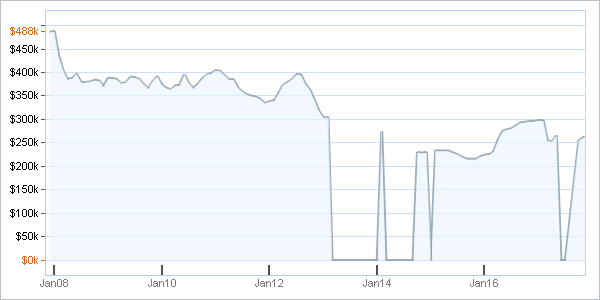

In [14]:
# Example (see from the above picture)
# We also can paste and test myChartUrl on web browser address bar
# http://www.zillow.com/app?chartDuration=1year&chartType=partner&height=150&page=webservice%2FGetChart&service=chart&width=300&zpid=48749425
myChartUrl = responseResultDict.get('Chart:chart')['response']['url']

# Get chart result from zillow website
opener = urllib2.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
response = opener.open(myChartUrl)
img_file = cStringIO.StringIO(response.read())
image = Image.open(img_file)

# Show the result
image


### REFERENCE LISTS:
### https://en.wikipedia.org/wiki/Zillow
### https://www.zillow.com/howto/api/APIOverview.htm

